In [1]:
import pandas as pd
import numpy as np

In [2]:
start_date = pd.Timestamp('2022-01-01')

In [3]:
end_date = pd.Timestamp('2022-07-04')

In [4]:
drange = pd.date_range(start_date, end_date, freq="17min")

In [5]:
stop_id = [x for x in range(len(drange))]

In [6]:
mydict = {"date_time": drange, "stop_id": stop_id}

In [7]:
df = pd.DataFrame(mydict)

In [8]:
df

,date_time,stop_id
0,2022-01-01 00:00:00,0
1,2022-01-01 00:17:00,1
2,2022-01-01 00:34:00,2
3,2022-01-01 00:51:00,3
4,2022-01-01 01:08:00,4
...,...,...
15581,2022-07-03 22:37:00,15581
15582,2022-07-03 22:54:00,15582
15583,2022-07-03 23:11:00,15583
15584,2022-07-03 23:28:00,15584


In [9]:
required_fields = {'stop_id',
                   'age', 'race', 'gender',
                   'lgbt', 'disabilities', 'limited_english',
                   'date_time', 'duration', 'location',
                   'reason_for_stop', 'actions_taken', 'call_for_service',
                   'basis_for_search', 'evidence_found', 'property_seized',
                   'result'}

In [10]:
def create_list(core_list, core_freq, series_len):
    elements = []
    for idx in range(len(core_freq)):
        elements.extend([core_list[idx] for x in range(core_freq[idx])])
    reps = int(np.ceil(series_len/len(core_list)))
    result = [elem for sub_list in (elements for x in range(reps)) for elem in sub_list]
    result = result[0:series_len]
    
    return result

In [11]:
required_fields

{'actions_taken',
 'age',
 'basis_for_search',
 'call_for_service',
 'date_time',
 'disabilities',
 'duration',
 'evidence_found',
 'gender',
 'lgbt',
 'limited_english',
 'location',
 'property_seized',
 'race',
 'reason_for_stop',
 'result',
 'stop_id'}

In [12]:
races = ['White', 'Hispanic/Latino/a', 'Asian', 'Middle Eastern or South Asian',
       'Black/African American', 'Pacific Islander', 'Native American']
races_freq = [593, 330, 241, 177,  56,  23,   5]
mydict["race"] = create_list(races, races_freq, len(df))
mydict["age"] = create_list(17+np.arange(60), np.ones(60, dtype=int), len(df))
mydict["gender"] = create_list(["male", "female", "nonbinary", "decline"], [5, 5, 2, 1], len(df))
action_list = ['No Action', 'Curbside detention', 'Handcuffed or flex cuffed',
       'Asked for consent to search property',
       'Person removed from vehicle by order', 'Field sobriety test conducted',
       'Search of person was conducted', 'Asked for consent to search person',
       'Property was seized', 'Patrol car detention']
action_values = [1330,   28,   25,   17,   17,    3,    2,    1,    1,    1]
mydict["actions_taken"] = create_list(action_list, action_values, len(df))
search_list = ['No Search',
       'Condition of parole / probation/ PRCS / mandatory supervision',
       'Incident to arrest', 'Consent given',
       'Officer Safety/safety of others', 'Evidence of crime',
       'Odor of contraband']
search_values = [1353,   26,   19,   13,   11,    2,    1]
mydict["basis_for_search"] = create_list(search_list, search_values, len(df))
mydict["call_for_service"] = create_list(['No', 'YES'], [467,   8], len(df))
disabilities_list = ['None', 'Speech impairment or limited use of language',
       'Mental health condition', 'Deafness or difficulty hearing',
       'Other disability']
disabilities_values = [459,  11,   3,   1,   1]
mydict["disabilities"] = create_list(disabilities_list, disabilities_values, len(df))
duration_list = [  5,   8,  10,   3,   7,   4,  15,  12,   9,   2,   6,  11,  20,
             13,  25,  30,   1,  14,  16,  45,  18,  60,  35,  40,  17, 180,
             50,  26,  32,  24,  37,  70, 189,  19, 140, 134, 120,  90,  67,
             38,  65,  22,  56,  28,  41, 380]
duration_values = [329, 245, 238,  79,  64,  60,  58,  57,  54,  43,  40,  21,  19,
        12,  11,  10,  10,   9,   8,   7,   6,   6,   6,   4,   3,   2,
         2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1]
mydict["duration"] = create_list(duration_list, duration_values, len(df))
evidence_list = ['None', 'Drug Paraphernalia', 'Suspected Stolen property',
       'Other Contraband or evidence', 'Alcohol',
       'Weapon(s) other than a firearm', 'Drugs/narcotics',
       'Cell phone(s) or electronic device(s)']
evidence_values = [1396,   12,    4,    4,    4,    3,    1,    1]
mydict["evidence_found"] = create_list(evidence_list, evidence_values, len(df))
mydict["lgbt"] = create_list(["No", "Yes"], [471, 4], len(df))
mydict["limited_english"] = create_list(["No", "Yes"], [1316,  109], len(df))
# location is a mess due to being a free field. Make up a prime number of locations
location_list = ["Main St", "Oak St", "Truman", "Foothill", "Edith", "Second St", "Fremont", 
                 "Roosevelt", "Toyon", "Black Mtn", "Magdalena"]
location_values = [4, 3, 7, 2, 9, 5, 6, 5, 9, 1, 3]
mydict["location"] = create_list(location_list, location_values, len(df))
# property_seized is not in the los altos data
property_list = ["None", "Firearms", "Drugs", "Vehicle", "Other"]
property_values = [93, 2, 5, 1, 7]
mydict["property_seized"] = create_list(property_list, property_values, len(df))
reason_list = ['Traffic Violation', 'Reasonable Suspicion',
       'Consensual Encounter resulting in a search',
       'Investigation to determine whether the person was truant',
       'Known to be on Parole / Probation / PRCS / Mandatory Supervision',
       'Knowledge of outstanding arrest warrant/wanted person']
reason_values = [1354,   50,    8,    8,    3,    2]
mydict["reason_for_stop"] = create_list(reason_list, reason_values, len(df))
result_list = ['Warning (verbal or written)', 'Citation for infraction', 'No Action',
       'In-field cite and release', 'Custodial Arrest without warrant',
       'Field interview card completed',
       'Custodial Arrest pursuant to outstanding warrant', 'Psychiatric hold',
       'Contacted parent/legal guardian or other person responsible for the minor',
       'Noncriminal transport or caretaking transport']
result_values = [662, 611,  80,  28,  19,   7,   6,   5,   4,   3]
mydict["result"] = create_list(result_list, result_values, len(df))

In [13]:
mydict.keys()

dict_keys(['date_time', 'stop_id', 'race', 'age', 'gender', 'actions_taken', 'basis_for_search', 'call_for_service', 'disabilities', 'duration', 'evidence_found', 'lgbt', 'limited_english', 'location', 'property_seized', 'reason_for_stop', 'result'])

In [14]:
df = pd.DataFrame(mydict)

In [15]:
import integrity.compliance as comp

In [16]:
comp.verbose_checks(df)

All required fields exist: PASS
All stops unique: PASS


True

In [17]:
import integrity.temporal as tp

In [18]:
tp.verbose_checks(df)

Sufficient time duration: PASS
    First stop: 2022-01-01 00:00:00
    Last stop:  2022-07-03 23:45:00
    Duration of data set: 183 days 23:45:00
Stops are in proper time order: PASS
Check for unexpected data gaps: PASS
Check for excessive stops by hour: PASS
Check for excessive stops by day of month: PASS
Check for excessive stop days: PASS
Check for excessive weekday: PASS


True

In [19]:
import testing.test_integrity as ti

In [20]:
testframe = ti.create_compliant_df(start_date, end_date)

In [21]:
tp.verbose_checks(testframe)

Sufficient time duration: PASS
    First stop: 2022-01-01 00:00:00
    Last stop:  2022-07-03 23:45:00
    Duration of data set: 183 days 23:45:00
Stops are in proper time order: PASS
Check for unexpected data gaps: PASS
Check for excessive stops by hour: PASS
Check for excessive stops by day of month: PASS
Check for excessive stop days: PASS
Check for excessive weekday: PASS


True

In [22]:
short_df  = df[0:10]

In [23]:
len(short_df)

10

In [24]:
comp.verbose_checks(short_df)

All required fields exist: PASS
All stops unique: PASS


True

In [25]:
tp.verbose_checks(short_df)

Sufficient time duration: FAIL
    First stop: 2022-01-01 00:00:00
    Last stop:  2022-01-01 02:33:00
    Duration of data set: 0 days 02:33:00
Stops are in proper time order: PASS
Check for unexpected data gaps: PASS
Check for excessive stops by hour: PASS
Check for excessive stops by day of month: PASS
Check for excessive stop days: PASS
Check for excessive weekday: PASS


False

In [26]:
short_df.drop('race', axis=1, inplace=False)

,date_time,stop_id,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-01 00:00:00,0,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
1,2022-01-01 00:17:00,1,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
2,2022-01-01 00:34:00,2,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
3,2022-01-01 00:51:00,3,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
4,2022-01-01 01:08:00,4,21,male,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
5,2022-01-01 01:25:00,5,22,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
6,2022-01-01 01:42:00,6,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
7,2022-01-01 01:59:00,7,24,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
8,2022-01-01 02:16:00,8,25,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
9,2022-01-01 02:33:00,9,26,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)


In [27]:
short_df

,date_time,stop_id,race,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-01 00:00:00,0,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
1,2022-01-01 00:17:00,1,White,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
2,2022-01-01 00:34:00,2,White,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
3,2022-01-01 00:51:00,3,White,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
4,2022-01-01 01:08:00,4,White,21,male,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
5,2022-01-01 01:25:00,5,White,22,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
6,2022-01-01 01:42:00,6,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
7,2022-01-01 01:59:00,7,White,24,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
8,2022-01-01 02:16:00,8,White,25,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
9,2022-01-01 02:33:00,9,White,26,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)


In [28]:
extra_row = short_df[0:1]

In [29]:
dup_df = short_df.append(extra_row, ignore_index=True)

In [30]:
dup_df

,date_time,stop_id,race,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-01 00:00:00,0,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
1,2022-01-01 00:17:00,1,White,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
2,2022-01-01 00:34:00,2,White,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
3,2022-01-01 00:51:00,3,White,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
4,2022-01-01 01:08:00,4,White,21,male,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
5,2022-01-01 01:25:00,5,White,22,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
6,2022-01-01 01:42:00,6,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
7,2022-01-01 01:59:00,7,White,24,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
8,2022-01-01 02:16:00,8,White,25,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
9,2022-01-01 02:33:00,9,White,26,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)


In [31]:
comp.verbose_checks(dup_df)

All required fields exist: PASS
All stops unique: FAIL
   Duplicate stop_ids: [0]


False

In [32]:
    uniqs = set(dup_df["stop_id"].unique())
    dups = set(dup_df["stop_id"]).difference(uniqs)


In [33]:
uniqs

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [34]:
dups

set()

In [35]:
dup_df["stop_id"]

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
10    0
Name: stop_id, dtype: int64

In [36]:
dup_df_set = set(dup_df["stop_id"])

In [37]:
dup_df_set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [38]:
dup_df.duplicated(['stop_id'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
dtype: bool

In [39]:
bob = dup_df[dup_df.duplicated(['stop_id'])]

In [40]:
bob.empty

False

In [41]:
dup_df["stop_id"].values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [42]:
dup_df

,date_time,stop_id,race,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-01 00:00:00,0,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
1,2022-01-01 00:17:00,1,White,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
2,2022-01-01 00:34:00,2,White,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
3,2022-01-01 00:51:00,3,White,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
4,2022-01-01 01:08:00,4,White,21,male,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
5,2022-01-01 01:25:00,5,White,22,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
6,2022-01-01 01:42:00,6,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
7,2022-01-01 01:59:00,7,White,24,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
8,2022-01-01 02:16:00,8,White,25,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)
9,2022-01-01 02:33:00,9,White,26,female,No Action,No Search,No,None,5,None,No,No,Truman,None,Traffic Violation,Warning (verbal or written)


In [43]:
df["date_time"].is_monotonic_increasing

True

In [44]:
bob=pd.Timestamp('2022-01-01')

In [45]:
bob

Timestamp('2022-01-01 00:00:00')

In [46]:
jim = bob.replace(hour=15)

In [47]:
jim

Timestamp('2022-01-01 15:00:00')

In [48]:
bob

Timestamp('2022-01-01 00:00:00')

In [58]:
bunched_df = ti.create_compliant_df(start_date, end_date)

In [50]:
bunched_df = bunched_df[0:10]

In [59]:
        for row in range(59):
            b_start_date = start_date.replace(day=27, minute=row)
            b_end_date = end_date.replace(day=27, minute=row)
            new_df = ti.create_compliant_df(b_start_date, b_end_date, freq="M")
            bunched_df = pd.concat([bunched_df, new_df], sort=False, ignore_index=True)
        bunched_df.sort_values("date_time", inplace=True)
        # make new stop_id values in the right order
        bunched_df["stop_id"] = [x for x in range(len(bunched_df))]


In [60]:
bunched_df

,date_time,stop_id,race,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-01 00:00:00,0,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
1,2022-01-01 00:17:00,1,White,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
2,2022-01-01 00:34:00,2,White,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
3,2022-01-01 00:51:00,3,White,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
4,2022-01-01 01:08:00,4,White,21,male,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,2022-07-27 00:54:00,15994,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
15977,2022-07-27 00:55:00,15995,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
15984,2022-07-27 00:56:00,15996,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
15991,2022-07-27 00:57:00,15997,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)


In [61]:
success, pparams, bad_days = tp.day_of_month_trends(bunched_df)

In [62]:
import plotting.lare_matplot as lmp

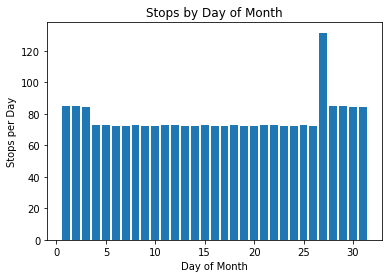

In [63]:
lmp.basic_plot(pparams)

In [64]:
new_df

,date_time,stop_id,race,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-27 00:58:00,0,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
1,2022-02-27 00:58:00,1,White,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
2,2022-03-27 00:58:00,2,White,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
3,2022-04-27 00:58:00,3,White,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
4,2022-05-27 00:58:00,4,White,21,male,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
5,2022-06-27 00:58:00,5,White,22,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
6,2022-07-27 00:58:00,6,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)


In [57]:
bunched_df["stop_id"] = [x for x in range(1860)]

ValueError: Length of values (1860) does not match length of index (423)

In [ ]:
pd.Timestamp('2022-01-01').replace(day=27)

In [ ]:
from pandas.tseries.offsets import DateOffset

In [69]:
start_date + pd.Timedelta("27sec")

Timestamp('2022-01-01 00:00:27')

In [ ]:
pd.date_range(start_date, end_date, freq=DateOffset(months=1))

In [ ]:
tp.verbose_checks(bunched_df, plotem=True)

In [67]:
        b_start_date = start_date + pd.Timedelta('1min')  # offset a bit
        b_end_date = (b_start_date + pd.Timedelta("1D"))
        new_df = ti.create_compliant_df(b_start_date, b_end_date, freq="1min")
        bunched_df = pd.concat([bunched_df, new_df], sort=False, ignore_index=True)
        bunched_df.sort_values("date_time", inplace=True)
        # make new stop_id values in the right order
        bunched_df["stop_id"] = [x for x in range(len(bunched_df))]


In [68]:
bunched_df

,date_time,stop_id,race,age,gender,actions_taken,basis_for_search,call_for_service,disabilities,duration,evidence_found,lgbt,limited_english,location,property_seized,reason_for_stop,result
0,2022-01-01 00:00:00,0,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
15999,2022-01-01 00:01:00,1,White,17,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
16000,2022-01-01 00:02:00,2,White,18,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
16001,2022-01-01 00:03:00,3,White,19,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
16002,2022-01-01 00:04:00,4,White,20,male,No Action,No Search,No,None,5,None,No,No,Main St,None,Traffic Violation,Warning (verbal or written)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,2022-07-27 00:54:00,17435,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
15995,2022-07-27 00:55:00,17436,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
15996,2022-07-27 00:56:00,17437,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
15997,2022-07-27 00:57:00,17438,White,23,female,No Action,No Search,No,None,5,None,No,No,Oak St,None,Traffic Violation,Warning (verbal or written)
